In [1]:
# -*- coding: utf-8 -*-
#Import Necessary Libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


#Read in and Explore the Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
features_details = train.describe(include = "all");
nan_value_detail = pd.isnull(train).sum();

In [3]:
print(features_details)
print(nan_value_detail)

             User_ID Product_ID  Gender     Age     Occupation City_Category  \
count   5.500680e+05     550068  550068  550068  550068.000000        550068   
unique           NaN       3631       2       7            NaN             3   
top              NaN  P00265242       M   26-35            NaN             B   
freq             NaN       1880  414259  219587            NaN        231173   
mean    1.003029e+06        NaN     NaN     NaN       8.076707           NaN   
std     1.727592e+03        NaN     NaN     NaN       6.522660           NaN   
min     1.000001e+06        NaN     NaN     NaN       0.000000           NaN   
25%     1.001516e+06        NaN     NaN     NaN       2.000000           NaN   
50%     1.003077e+06        NaN     NaN     NaN       7.000000           NaN   
75%     1.004478e+06        NaN     NaN     NaN      14.000000           NaN   
max     1.006040e+06        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_Current_City_Years  Mari

In [4]:
#outliers
mean = np.mean(train['Purchase'], axis=0)
sd = np.std(train['Purchase'], axis=0)
cut_off = sd * 3
lower, upper = mean - cut_off, mean + cut_off
weight_outliers = [x for x in train['Purchase'] if x < lower or x > upper]
print(len(weight_outliers))

0


In [5]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderGroup
0,1000001,P00069042,0-17,10,A,2,0,3,NaN,NaN,8370,1
1,1000001,P00248942,0-17,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,0-17,10,A,2,0,12,NaN,NaN,1422,1
3,1000001,P00085442,0-17,10,A,2,0,12,14.0,NaN,1057,1
4,1000002,P00285442,55+,16,C,4+,0,8,NaN,NaN,7969,2


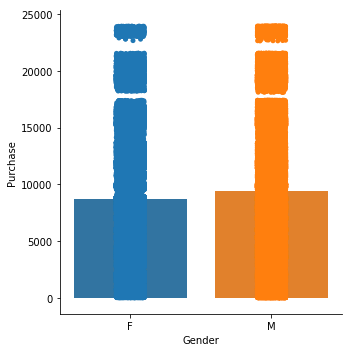

In [6]:
sns.catplot(x="Gender", y="Purchase", data=train)
sns.barplot(x="Gender", y="Purchase", data=train)
Gender_unique = np.unique(train['Gender']);
Gender_mapping = {Gender_unique[0]: 1, Gender_unique[1]: 2}
train['GenderGroup'] = train['Gender'].map(Gender_mapping)
test['GenderGroup'] = test['Gender'].map(Gender_mapping)
#dropping the depart feature for now, might change
train = train.drop(['Gender'], axis = 1)
test = test.drop(['Gender'], axis = 1)
train.head()

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderGroup,AgeGroup
0,1000001,P00069042,10,A,2,0,3,NaN,NaN,8370,1,1
1,1000001,P00248942,10,A,2,0,1,6.0,14.0,15200,1,1
2,1000001,P00087842,10,A,2,0,12,NaN,NaN,1422,1,1
3,1000001,P00085442,10,A,2,0,12,14.0,NaN,1057,1,1
4,1000002,P00285442,16,C,4+,0,8,NaN,NaN,7969,2,7


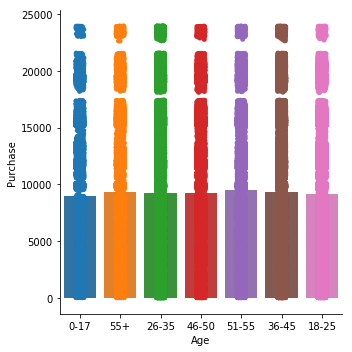

In [7]:
sns.catplot(x="Age", y="Purchase", data=train)
sns.barplot(x="Age", y="Purchase", data=train)
Age_unique = np.unique(train['Age']);
Age = dict()
r = 1
for rui in Age_unique:
    Age[rui] = r
    r = r + 1
train['AgeGroup'] = train['Age'].map(Age)
test['AgeGroup'] = test['Age'].map(Age)
#dropping the depart feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)
train.head()

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderGroup,AgeGroup,OccupationGroup
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370,1,1,11
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200,1,1,11
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422,1,1,11
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057,1,1,11
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969,2,7,17


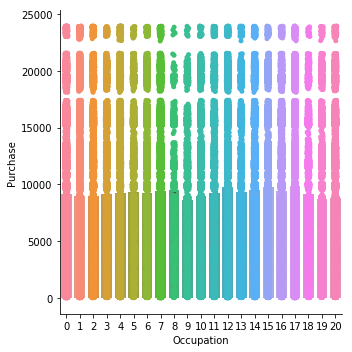

In [8]:
sns.catplot(x="Occupation", y="Purchase", data=train)
sns.barplot(x="Occupation", y="Purchase", data=train)
Occupation_unique = np.unique(train['Occupation']);
Occupation = dict()
r = 1
for rui in Occupation_unique:
    Occupation[rui] = r
    r = r + 1
train['OccupationGroup'] = train['Occupation'].map(Occupation)
test['OccupationGroup'] = test['Occupation'].map(Occupation)
#dropping the depart feature for now, might change
train = train.drop(['Occupation'], axis = 1)
test = test.drop(['Occupation'], axis = 1)
train.head()

,User_ID,Product_ID,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderGroup,AgeGroup,OccupationGroup,City_CategoryGroup
0,1000001,P00069042,2,0,3,NaN,NaN,8370,1,1,11,1
1,1000001,P00248942,2,0,1,6.0,14.0,15200,1,1,11,1
2,1000001,P00087842,2,0,12,NaN,NaN,1422,1,1,11,1
3,1000001,P00085442,2,0,12,14.0,NaN,1057,1,1,11,1
4,1000002,P00285442,4+,0,8,NaN,NaN,7969,2,7,17,3


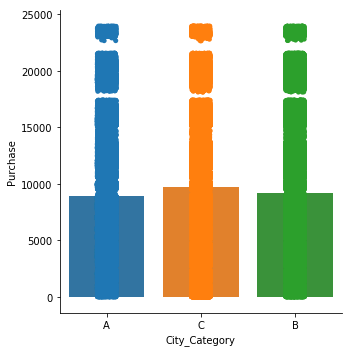

In [9]:
sns.catplot(x="City_Category", y="Purchase", data=train)
sns.barplot(x="City_Category", y="Purchase", data=train)
City_Category_unique = np.unique(train['City_Category']);
City_Category = dict()
r = 1
for rui in City_Category_unique:
    City_Category[rui] = r
    r = r + 1
train['City_CategoryGroup'] = train['City_Category'].map(City_Category)
test['City_CategoryGroup'] = test['City_Category'].map(City_Category)
#dropping the depart feature for now, might change
train = train.drop(['City_Category'], axis = 1)
test = test.drop(['City_Category'], axis = 1)
train.head()

,User_ID,Product_ID,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderGroup,AgeGroup,OccupationGroup,City_CategoryGroup,Stay_In_Current_City_YearsGroup
0,1000001,P00069042,0,3,NaN,NaN,8370,1,1,11,1,3
1,1000001,P00248942,0,1,6.0,14.0,15200,1,1,11,1,3
2,1000001,P00087842,0,12,NaN,NaN,1422,1,1,11,1,3
3,1000001,P00085442,0,12,14.0,NaN,1057,1,1,11,1,3
4,1000002,P00285442,0,8,NaN,NaN,7969,2,7,17,3,5


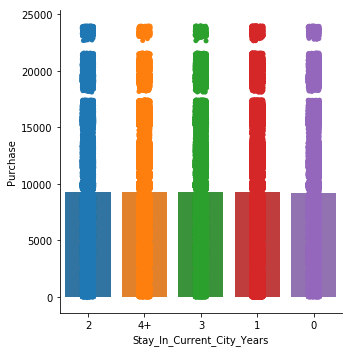

In [10]:
sns.catplot(x="Stay_In_Current_City_Years", y="Purchase", data=train)
sns.barplot(x="Stay_In_Current_City_Years", y="Purchase", data=train)
Stay_In_Current_City_Years_unique = np.unique(train['Stay_In_Current_City_Years']);
Stay_In_Current_City_Years = dict()
r = 1
for rui in Stay_In_Current_City_Years_unique:
    Stay_In_Current_City_Years[rui] = r
    r = r + 1
train['Stay_In_Current_City_YearsGroup'] = train['Stay_In_Current_City_Years'].map(Stay_In_Current_City_Years)
test['Stay_In_Current_City_YearsGroup'] = test['Stay_In_Current_City_Years'].map(Stay_In_Current_City_Years)
#dropping the depart feature for now, might change
train = train.drop(['Stay_In_Current_City_Years'], axis = 1)
test = test.drop(['Stay_In_Current_City_Years'], axis = 1)
train.head()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


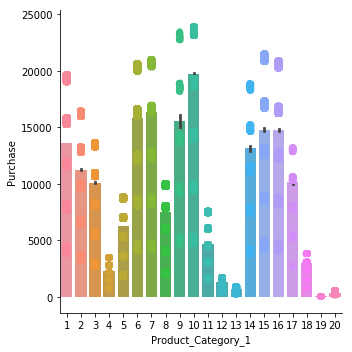

In [11]:
sns.catplot(x="Product_Category_1", y="Purchase", data=train)
sns.barplot(x="Product_Category_1", y="Purchase", data=train)
Product_Category_1_unique = np.unique(train['Product_Category_1']);
print(Product_Category_1_unique)

In [23]:
#train.Product_ID = train.where(train['Product_Category_1']==1)
for pc in Product_Category_1_unique:
    pca = pc+'safdsf'
    train[str(pca)] = 0

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')

In [51]:
for pc in Product_Category_1_unique:
    train[pc] = train.Product_Category_1 == pc
train.head(5)

,User_ID,Product_ID,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderGroup,AgeGroup,OccupationGroup,...,11,12,13,14,15,16,17,18,19,20
0,1000001,P00069042,0,3,NaN,NaN,8370,1,0,11,...,False,False,False,False,False,False,False,False,False,False
1,1000001,P00248942,0,1,6.0,14.0,15200,1,0,11,...,False,False,False,False,False,False,False,False,False,False
2,1000001,P00087842,0,12,NaN,NaN,1422,1,0,11,...,False,True,False,False,False,False,False,False,False,False
3,1000001,P00085442,0,12,14.0,NaN,1057,1,0,11,...,False,True,False,False,False,False,False,False,False,False
4,1000002,P00285442,0,8,NaN,NaN,7969,2,0,17,...,False,False,False,False,False,False,False,False,False,False


In [54]:
train['12'].head(100)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99    0
Name: 12, Length: 100, dtype: int64

In [24]:
for x in range(len(train["12"])):
    if train["12"][x] != "True":
        train["12"][x] = 0

KeyboardInterrupt: 

In [ ]:
train.head()